### Project Name :- Medical Insurance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [2]:
#loading the data from the csv file to a pandas Dataframe
data = pd.read_csv("medical_insurance.csv")

In [3]:
# Copy Data 
df = data.copy()

In [4]:
#printing the first 5 rows from the dataframe
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [5]:
#find the no of rows and column
df.shape

(2772, 7)

In [6]:
# Showing Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


### About Dataset
* Dataset Overview: The medical insurance dataset encompasses various factors influencing medical expenses, such as age, sex, BMI, smoking status, number of children, and region. This dataset serves as a foundation for training machine learning models capable of forecasting medical expenses for new policyholders.

### Its purpose is to shed light on the pivotal elements contributing to increased insurance costs, aiding the company in making more informed decisions concerning pricing and risk assessment.

### Problem Statement:
* What are the primary factors influencing medical expenses?
* How accurate are machine learning models in predicting medical expenses?
* In what ways can machine learning models enhance the efficiency and profitability of health insurance companies?
* If you find the dataset intriguing, please consider upvoting.

In [7]:
# Display 10 Sample of the Data 
df.sample(10)

age     sex     bmi  children smoker     region      charges
464    19    male  25.175         0     no  northwest   1632.03625
616    56  female  28.595         0     no  northeast  11658.11505
950    57    male  18.335         0     no  northeast  11534.87265
2484   52  female  30.875         0     no  northeast  23045.56616
1016   19  female  24.605         1     no  northwest   2709.24395
321    26  female  29.640         4     no  northeast  24671.66334
1055   55    male  27.645         0     no  northwest  10594.50155
143    29    male  29.735         2     no  northwest  18157.87600
2127   27    male  29.150         0    yes  southeast  18246.49550
1585   64  female  39.330         0     no  northeast  14901.51670

In [8]:
#Check the null values or not.
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.describe()

age          bmi     children       charges
count  2772.000000  2772.000000  2772.000000   2772.000000
mean     39.109668    30.701349     1.101732  13261.369959
std      14.081459     6.129449     1.214806  12151.768945
min      18.000000    15.960000     0.000000   1121.873900
25%      26.000000    26.220000     0.000000   4687.797000
50%      39.000000    30.447500     1.000000   9333.014350
75%      51.000000    34.770000     2.000000  16577.779500
max      64.000000    53.130000     5.000000  63770.428010

In [10]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2767     True
2768     True
2769     True
2770     True
2771     True
Length: 2772, dtype: bool

In [11]:
df.duplicated().sum()

1435

In [12]:
# Display the select index locations with help of iloc[] function
df.iloc[[2767,2768,2768,2769,2770,2771]]

age     sex     bmi  children smoker     region      charges
2767   47  female  45.320         1     no  southeast   8569.86180
2768   21  female  34.600         0     no  southwest   2020.17700
2768   21  female  34.600         0     no  southwest   2020.17700
2769   19    male  26.030         1    yes  northwest  16450.89470
2770   23    male  18.715         0     no  northwest  21595.38229
2771   54    male  31.600         0     no  southwest   9850.43200

In [13]:
# Exploring transaction type with the help of value_counts() function
for i in df:
    print(df[i].value_counts())
    print("------------------------------------")

age
18    148
19    142
47     62
52     62
45     62
23     62
46     60
54     60
51     60
28     60
21     60
22     60
26     60
25     58
50     58
27     58
20     58
53     58
48     58
49     56
44     56
41     56
24     56
32     56
30     56
56     56
39     54
33     54
42     54
40     54
43     54
31     54
57     54
29     54
37     52
59     52
58     52
34     52
55     52
35     50
36     50
38     50
62     48
60     46
64     46
63     46
61     46
Name: count, dtype: int64
------------------------------------
sex
male      1406
female    1366
Name: count, dtype: int64
------------------------------------
bmi
32.300    26
28.310    18
33.330    16
30.800    16
30.875    16
          ..
46.200     2
23.800     2
44.770     2
32.120     2
30.970     2
Name: count, Length: 548, dtype: int64
------------------------------------
children
0    1186
1     672
2     496
3     324
4      52
5      42
Name: count, dtype: int64
------------------------------------
smoker
no  

In [14]:
# trying to fing the how much different lables are present in our dataset
for col in df.columns:
    print(col, ":", len(df[col].unique()),"labels")

age : 47 labels
sex : 2 labels
bmi : 548 labels
children : 6 labels
smoker : 2 labels
region : 4 labels
charges : 1337 labels


In [15]:
# Display the top 10 rows of the data
df.head(10)

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692

Text(0.5, 1.0, 'Age')

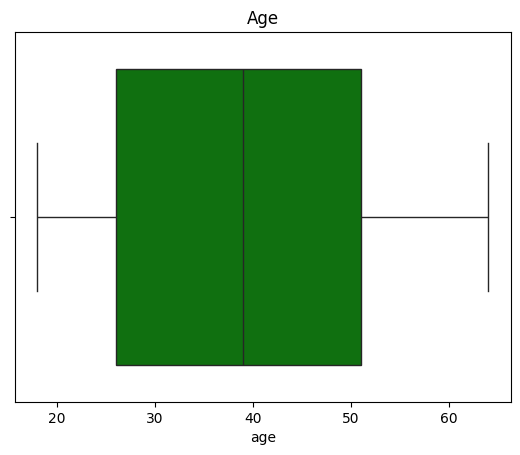

In [16]:
# Display the boxplot of age column
sns.boxplot(df["age"],orient="h",color="g").set_title("Age")

Text(0.5, 1.0, 'Body Mass Index (BMI)')

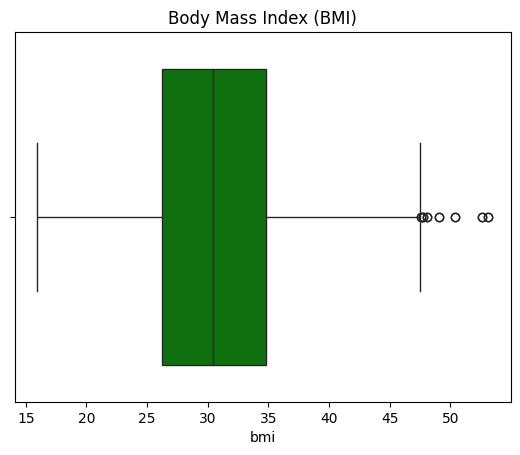

In [17]:
# Display the boxplot of bmi column
sns.boxplot(df["bmi"],orient="h",color="g").set_title("Body Mass Index (BMI)")

In [18]:
# Display the boxplot of children column
sns.boxplot(df["children"],orient="h",color="g").set_title("Number of childrens")

Text(0.5, 1.0, 'Number of childrens')

In [19]:
# Display the boxplot of charges column
sns.boxplot(df["charges"],orient="h",color="g").set_title("Premium charges")

Text(0.5, 1.0, 'Premium charges')

<Axes: xlabel='charges', ylabel='Count'>

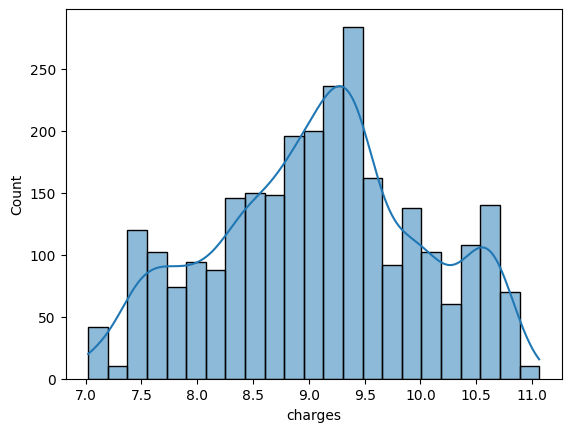

In [20]:
# Display the histplot of charges column
sns.histplot(np.log(df["charges"]),kde=True)

In [21]:
# Display the histplot of bmi column
sns.histplot(np.log(df["bmi"]),kde=True)

<Axes: xlabel='bmi', ylabel='Count'>

In [22]:
# Display the histplot for compairing bmi amd charges column
log_transformed_data = np.log(df[["bmi","charges"]])

In [23]:
sns.histplot(log_transformed_data,kde=True)

<Axes: ylabel='Count'>

In [24]:
# LabelEncoder can be used to normalize labels.
label_encoder = LabelEncoder()
df["sex"] = label_encoder.fit_transform(df["sex"])
df["smoker"] = label_encoder.fit_transform(df["smoker"])
label_encoder

LabelEncoder()

In [25]:
df

age  sex     bmi  children  smoker     region      charges
0      19    0  27.900         0       1  southwest  16884.92400
1      18    1  33.770         1       0  southeast   1725.55230
2      28    1  33.000         3       0  southeast   4449.46200
3      33    1  22.705         0       0  northwest  21984.47061
4      32    1  28.880         0       0  northwest   3866.85520
...   ...  ...     ...       ...     ...        ...          ...
2767   47    0  45.320         1       0  southeast   8569.86180
2768   21    0  34.600         0       0  southwest   2020.17700
2769   19    1  26.030         1       1  northwest  16450.89470
2770   23    1  18.715         0       0  northwest  21595.38229
2771   54    1  31.600         0       0  southwest   9850.43200

[2772 rows x 7 columns]

In [26]:
# get_dummies can be used to Convert categorical variable into dummy/indicator variables.
one_hot_encoded_data = pd.get_dummies(df, columns = ["region"]) 

In [27]:
one_hot_encoded_data

age  sex     bmi  children  smoker      charges  region_northeast  \
0      19    0  27.900         0       1  16884.92400             False   
1      18    1  33.770         1       0   1725.55230             False   
2      28    1  33.000         3       0   4449.46200             False   
3      33    1  22.705         0       0  21984.47061             False   
4      32    1  28.880         0       0   3866.85520             False   
...   ...  ...     ...       ...     ...          ...               ...   
2767   47    0  45.320         1       0   8569.86180             False   
2768   21    0  34.600         0       0   2020.17700             False   
2769   19    1  26.030         1       1  16450.89470             False   
2770   23    1  18.715         0       0  21595.38229             False   
2771   54    1  31.600         0       0   9850.43200             False   

      region_northwest  region_southeast  region_southwest  
0                False             False              True  
1                False              True             False  
2                False              True             False  
3                 True             False             False  
4                 True             False             False  
...                ...               ...               ...  
2767             False              True             False  
2768             False             False              True  
2769              True             False             False  
2770              True             False             False  
2771             False             False              True  

[2772 rows x 10 columns]

In [29]:
x = one_hot_encoded_data
y = one_hot_encoded_data["charges"]

age  sex     bmi  children  smoker      charges  region_northeast  \
0      19    0  27.900         0       1  16884.92400             False   
1      18    1  33.770         1       0   1725.55230             False   
2      28    1  33.000         3       0   4449.46200             False   
3      33    1  22.705         0       0  21984.47061             False   
4      32    1  28.880         0       0   3866.85520             False   
...   ...  ...     ...       ...     ...          ...               ...   
2767   47    0  45.320         1       0   8569.86180             False   
2768   21    0  34.600         0       0   2020.17700             False   
2769   19    1  26.030         1       1  16450.89470             False   
2770   23    1  18.715         0       0  21595.38229             False   
2771   54    1  31.600         0       0   9850.43200             False   

      region_northwest  region_southeast  region_southwest  
0                False             False              True  
1                False              True             False  
2                False              True             False  
3                 True             False             False  
4                 True             False             False  
...                ...               ...               ...  
2767             False              True             False  
2768             False             False              True  
2769              True             False             False  
2770              True             False             False  
2771             False             False              True  

[2772 rows x 10 columns]

In [32]:
x

age  sex     bmi  children  smoker      charges  region_northeast  \
0      19    0  27.900         0       1  16884.92400             False   
1      18    1  33.770         1       0   1725.55230             False   
2      28    1  33.000         3       0   4449.46200             False   
3      33    1  22.705         0       0  21984.47061             False   
4      32    1  28.880         0       0   3866.85520             False   
...   ...  ...     ...       ...     ...          ...               ...   
2767   47    0  45.320         1       0   8569.86180             False   
2768   21    0  34.600         0       0   2020.17700             False   
2769   19    1  26.030         1       1  16450.89470             False   
2770   23    1  18.715         0       0  21595.38229             False   
2771   54    1  31.600         0       0   9850.43200             False   

      region_northwest  region_southeast  region_southwest  
0                False             False              True  
1                False              True             False  
2                False              True             False  
3                 True             False             False  
4                 True             False             False  
...                ...               ...               ...  
2767             False              True             False  
2768             False             False              True  
2769              True             False             False  
2770              True             False             False  
2771             False             False              True  

[2772 rows x 10 columns]

In [33]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
2767     8569.86180
2768     2020.17700
2769    16450.89470
2770    21595.38229
2771     9850.43200
Name: charges, Length: 2772, dtype: float64

In [34]:
x.drop(["charges"],axis=1,inplace=True)

### train_test_split

In [35]:
# Split arrays or matrices into random train and test subsets.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=54)

In [38]:
# Here we print shape of x_train, x_test, y_train, y_test
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (2217, 9)
x_test shape (555, 9)
y_train shape (2217,)
y_test shape (555,)


### StandardScaler

In [39]:
ss = StandardScaler()
ss

StandardScaler()

In [40]:
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)
x_train, x_test

(array([[-0.91508122,  0.99415331,  0.78341772, ..., -0.56953732,
          1.62861561, -0.56398025],
        [-1.41221577, -1.00588107, -0.28423366, ..., -0.56953732,
         -0.61401843,  1.77311174],
        [ 0.29224554, -1.00588107, -0.12048345, ..., -0.56953732,
         -0.61401843,  1.77311174],
        ...,
        [-1.34119654, -1.00588107,  0.18900445, ..., -0.56953732,
          1.62861561, -0.56398025],
        [-1.1991581 ,  0.99415331,  3.59337134, ..., -0.56953732,
          1.62861561, -0.56398025],
        [-1.48323499, -1.00588107,  1.57596874, ..., -0.56953732,
          1.62861561, -0.56398025]]),
 array([[ 0.56944996,  0.95247913, -0.02953166, ..., -0.5280169 ,
         -0.63365223, -0.60580118],
        [ 0.14197738, -1.04989177,  1.51562228, ..., -0.5280169 ,
          1.57815273, -0.60580118],
        [ 0.49820453,  0.95247913, -0.44280797, ..., -0.5280169 ,
         -0.63365223, -0.60580118],
        ...,
        [-1.14044037,  0.95247913,  1.48017558, ..., -

In [41]:
lr = LinearRegression()
lr

LinearRegression()

In [42]:
model = lr.fit(x_train,y_train)
model

LinearRegression()

In [43]:
y_pred = model.predict(x_test)
y_pred

array([11552.08742497, 34058.86368891, 11044.30929985,  1037.47842762,
       37231.13218083, 14201.60259272, 27521.43959449,  1383.45565346,
       12686.51153984,  -356.72128582, 35046.09768296, 11084.4710034 ,
       33560.10210021, 36285.38390654,  5441.24431198,  2058.62927614,
       10687.30584394, 10218.80421448,  7181.60459873, 11941.3104754 ,
        3880.96208942, 11651.10362639, -2574.60424656,  6551.00690137,
       12285.32203506, 36546.58623752, 26119.31893797,  5667.97906081,
        3270.44629185, 14753.19941009,  2165.7786097 ,  9389.54823748,
        3670.1942546 , 29673.29640891, 23930.26575485,  4829.90130821,
       37491.9777731 , 13692.53407933,  6249.58658574, 34447.950559  ,
       10770.92918034, 10198.63053714, 13766.64312091,   973.79393474,
       11948.54331821,  2129.14755581,  6923.53186506,  8154.24420507,
        7674.06465641, 33982.58441413, 11862.628525  ,  9607.10893554,
       10700.39658063,  9110.35186015, 11120.36211442, 14104.66242001,
      

### r2 Score

In [44]:
print(f"R2_Score : {r2_score(y_test,y_pred)}")
print(f"Mean_Squared_Error : { mean_squared_error(y_test,y_pred)}")

R2_Score : 0.7582902906285933
Mean_Squared_Error : 41884669.72891505


In [45]:
# Show Scatter plot of y_test, y_pred
plt.scatter(y_test,y_pred,)
plt.show()

### Here we Show Scatter plot with Best-Fit Line

In [46]:
# Generate some sample data
x = y_test
y = y_pred

# Calculate the coefficients of the best-fit line (simple linear regression)
slope, intercept = np.polyfit(x, y, 1)

# Plot the scatter plot
plt.scatter(x, y, label='Data Points')

# Plot the best-fit line
plt.plot(x, slope * x + intercept, color='red', label='Best-Fit Line')

# Add labels and legend
plt.xlabel('Actual Points')
plt.ylabel('Predicated Points')
plt.title('Scatter Plot with Best-Fit Line')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

### RandomForestRegressor

In [47]:
rf_r = RandomForestRegressor()
rf_r

RandomForestRegressor()

In [48]:
model = rf_r.fit(x_train,y_train)
model

RandomForestRegressor()

In [49]:
y_pred1 = model.predict(x_test)
y_pred1

array([11500.4838178 , 42729.2465116 , 10000.4799902 ,  4839.2433083 ,
       48822.7327576 , 14832.6232552 , 36580.9221887 ,  2247.6344204 ,
        8556.6812702 ,  1704.5681    , 45386.3437492 ,  4746.082599  ,
       42440.7221159 , 46583.0583074 ,  4413.1915841 ,  1262.119176  ,
       13546.12492   , 10829.5072015 ,  6388.9739069 ,  8945.94329   ,
        7953.2513278 , 12780.332408  ,  4492.6629541 ,  9163.9486162 ,
        9877.5895811 , 50012.3673915 , 17673.9792432 ,  8501.092669  ,
        7106.7014531 , 30280.5266635 ,  1143.350996  , 13300.6954259 ,
        1828.37636143, 38335.2911083 , 17391.3627435 ,  2005.82255375,
       47669.1802367 , 13039.9626244 ,  5482.8997192 , 45611.9024423 ,
        8970.700975  , 13017.0624525 , 10078.061145  ,  2430.11427   ,
        8407.3788674 ,  3786.8744053 , 12488.6688927 ,  5731.8154175 ,
        7318.0692922 , 47385.237126  , 10353.30344   ,  8160.7869997 ,
        9119.8860379 ,  8331.911393  , 10872.5339657 , 11837.4925249 ,
      

In [50]:
print(f"R2_Score : {r2_score(y_test,y_pred1)}")
print(f"Mean_Squared_Error : { mean_squared_error(y_test,y_pred1)}")

R2_Score : 0.9019939386103478
Mean_Squared_Error : 16982981.459092982


### Support Vector Machine (SVM)

In [51]:
svr = SVR()
svr

SVR()

In [52]:
model = svr.fit(x_train,y_train)
model

SVR()

In [55]:
y_pred2 = model.predict(x_test)
y_pred2

array([9232.6851305 , 9285.78261539, 9227.93169552, 9113.19693161,
       9307.01757864, 9241.95306861, 9254.75821322, 9099.10544406,
       9237.85157638, 9134.62325241, 9274.61793288, 9175.56864049,
       9304.25733132, 9330.97485979, 9101.88542372, 9086.83416985,
       9283.0082682 , 9224.82654279, 9150.30162457, 9203.08369468,
       9190.283915  , 9251.41787299, 9121.48738511, 9181.87996176,
       9228.68872383, 9332.7226373 , 9251.9770016 , 9193.44877845,
       9138.09540227, 9259.79916031, 9087.49029206, 9151.62525453,
       9097.99399212, 9280.03721599, 9229.92972107, 9105.40195635,
       9311.20022207, 9284.18486386, 9136.55334567, 9302.60258736,
       9217.08511557, 9207.68304222, 9225.76854721, 9091.84367193,
       9192.51046303, 9092.20756404, 9186.86262258, 9165.11169464,
       9174.95139732, 9334.68846961, 9212.54984827, 9173.70879485,
       9212.75340167, 9188.53733558, 9223.32579331, 9234.71693383,
       9177.06912296, 9206.5832501 , 9100.46914113, 9095.40108

In [57]:
print(f"R2_Score : {r2_score(y_test,y_pred2)}")
print(f"Mean_Squared_Error : { mean_squared_error(y_test,y_pred2)}")

R2_Score : -0.1484428312252224
Mean_Squared_Error : 199007929.02984166


### Thank You...!!